In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
from coffea import hist
import re

In [76]:
output = load('hists_ctagtest_ctag_AK4_med.coffea')

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
from cycler import cycler
colors=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]


-2.5
-2.0
-1.5
-0.5
0.0
0.5
1.5
2.0
2.5


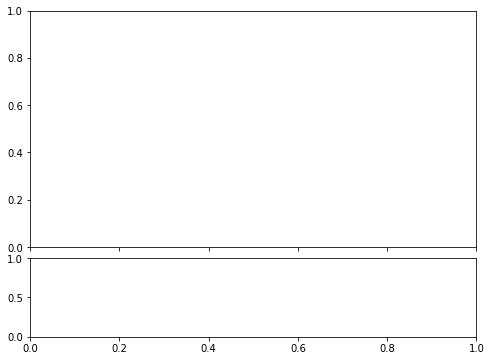

In [79]:
def scale_xs(hist,lumi,events):
    #xsection in pb
    xs_dict = {
        'QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8':3820000,
        'QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8':2960000,
        'QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8':1652471,
        'QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8':437504,
        'QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8':106033,
        'QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8':24720,
        'QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8':8654,
        'QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8':797,
        'QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8':79,
        'QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8':25,
        'QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8':4.7,
        'QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8':1.6,
        'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8':61524,
        'DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8':6024,
        'TTToHadronic_TuneCP5_13TeV-powheg-pythia8':313.9,
        'TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8':72.1,
        'TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8':300.9,
        'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8':35.6,
        'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8':35.6,
        'ST_t-channel_top_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8':136.02,
        'ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8':80.95,
        'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8':3.74,
        'ST_s-channel_4f_hadronicDecays_TuneCP5_13TeV-amcatnlo-pythia8':11.24,
        "WW_TuneCP5_13TeV-pythia8":63.21,
        "WZ_TuneCP5_13TeV-pythia8":47.13,
        "ZZ_TuneCP5_13TeV-pythia8":16.523   
    }
    scales={}

    for key in events:
        if type(key) != str or key=="Data": continue
        scales[key]=xs_dict[key]*lumi/events[key]
    h.scale(scales, axis="dataset")
    return h